In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
data = pd.read_csv('dynamic_pricing.csv')
data

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


In [6]:
for column in data.columns:
    print(column)
    print(data[column].value_counts())

Number_of_Riders
100    19
53     18
93     18
94     18
61     18
       ..
78      8
66      7
81      7
41      7
82      7
Name: Number_of_Riders, Length: 81, dtype: int64
Number_of_Drivers
7     52
6     41
8     38
9     35
13    31
      ..
52     1
84     1
89     1
85     1
82     1
Name: Number_of_Drivers, Length: 79, dtype: int64
Location_Category
Urban       346
Rural       332
Suburban    322
Name: Location_Category, dtype: int64
Customer_Loyalty_Status
Silver     367
Regular    320
Gold       313
Name: Customer_Loyalty_Status, dtype: int64
Number_of_Past_Rides
88    21
15    17
67    17
24    16
26    16
      ..
43     5
29     5
4      5
50     4
81     3
Name: Number_of_Past_Rides, Length: 101, dtype: int64
Average_Ratings
4.20    13
4.44    13
4.30    13
3.60    12
4.59    12
        ..
3.70     2
4.94     2
4.67     2
4.53     1
3.89     1
Name: Average_Ratings, Length: 151, dtype: int64
Time_of_Booking
Night        276
Afternoon    247
Morning      246
Evening      

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.2+ KB


In [8]:
data.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [9]:
data.describe(exclude = np.number).T

,count,unique,top,freq
Location_Category,1000,3,Urban,346
Customer_Loyalty_Status,1000,3,Silver,367
Time_of_Booking,1000,4,Night,276
Vehicle_Type,1000,2,Premium,522


In [10]:
data.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [11]:
data.drop_duplicates(inplace = True)

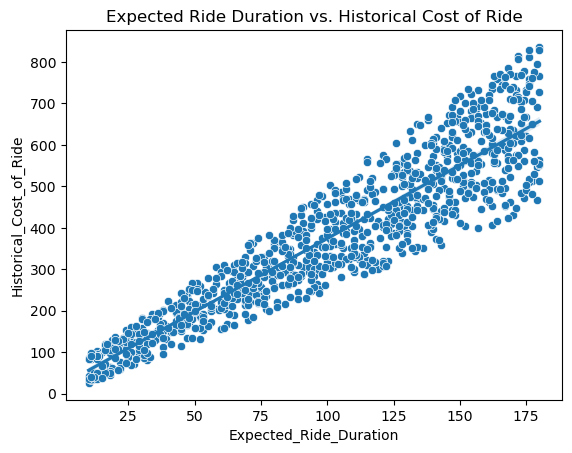

In [16]:

fig = sns.scatterplot(data=data, x='Expected_Ride_Duration', 
                 y='Historical_Cost_of_Ride')
sns.regplot(data=data, x='Expected_Ride_Duration', 
            y='Historical_Cost_of_Ride', scatter=False)

plt.title('Expected Ride Duration vs. Historical Cost of Ride')

plt.show()

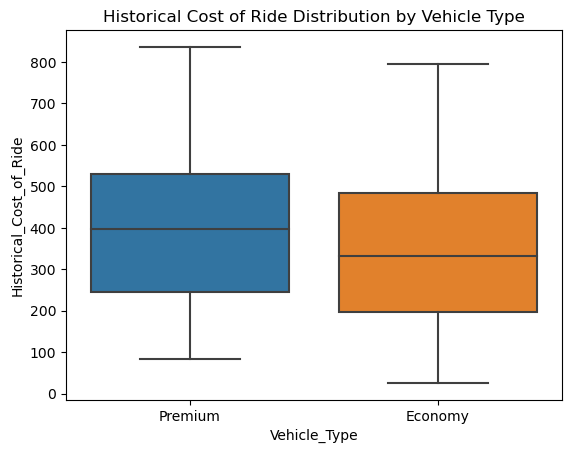

In [19]:
#Distribution of the historical cost of rides based on the vehicle type
fig = sns.boxplot(data=data, x='Vehicle_Type', 
             y='Historical_Cost_of_Ride')
plt.title('Historical Cost of Ride Distribution by Vehicle Type')
plt.show()

In [20]:
correlation_matrix = data.corr()

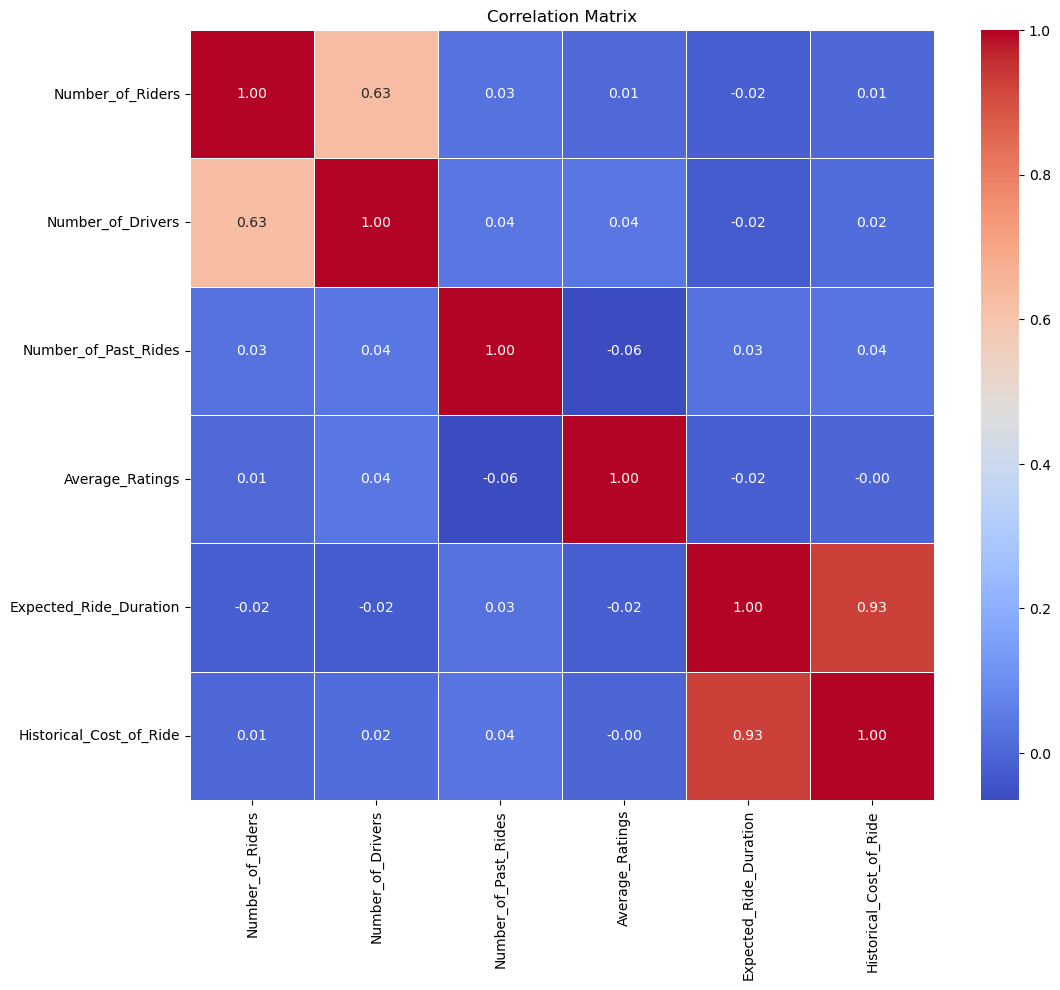

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

There is a high correlation between the historical cost of ride and expected ride duration

# Implementing a Dynamic Pricing Strategy

The data provided by the company states that the company uses a pricing model that only takes the expected ride duration as a factor to determine the price for a ride. Now, we will implement a dynamic pricing strategy aiming to adjust the ride costs dynamically based on the demand and supply levels observed in the data. It will capture high-demand periods and low-supply scenarios to increase prices, while low-demand periods and high-supply situations will lead to price reductions.

In [32]:
# Calculate demand_multiplier based on percentile for high and low demand
high_demand_percentile = 75
low_demand_percentile = 25

data['demand_multiplier'] = np.where(data['Number_of_Riders'] > np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], high_demand_percentile),
                                     data['Number_of_Riders'] / np.percentile(data['Number_of_Riders'], low_demand_percentile))

data['demand_multiplier']

0      1.111111
1      1.450000
2      1.050000
3      1.098765
4      1.950000
         ...   
995    0.825000
996    1.037037
997    1.100000
998    1.325000
999    1.950000
Name: demand_multiplier, Length: 1000, dtype: float64

The code above calculates a demand multiplier for each row in the Data based on whether the number of riders is above or below certain percentiles. If the number of riders is above a high demand percentile, the demand multiplier is calculated by dividing the number of riders by the high demand percentile. If the number of riders is below a low demand percentile, the demand multiplier is calculated by dividing the number of riders by the low demand percentile.








In [28]:
# Calculate supply_multiplier based on percentile for high and low supply
high_supply_percentile = 75
low_supply_percentile = 25

data['supply_multiplier'] = np.where(data['Number_of_Drivers'] > np.percentile(data['Number_of_Drivers'], low_supply_percentile),
                                     np.percentile(data['Number_of_Drivers'], high_supply_percentile) / data['Number_of_Drivers'],
                                     np.percentile(data['Number_of_Drivers'], low_supply_percentile) / data['Number_of_Drivers'])
data['supply_multiplier']

0      0.844444
1      0.974359
2      1.225806
3      1.357143
4      1.727273
         ...   
995    1.652174
996    1.310345
997    1.833333
998    1.407407
999    0.603175
Name: supply_multiplier, Length: 1000, dtype: float64

In [25]:
# Define price adjustment factors for high and low demand/supply
demand_threshold_high = 1.2  # Higher demand threshold
demand_threshold_low = 0.8  # Lower demand threshold
supply_threshold_high = 0.8  # Higher supply threshold
supply_threshold_low = 1.2  # Lower supply threshold


In [29]:
# Calculate adjusted_ride_cost for dynamic pricing
data['adjusted_ride_cost'] = data['Historical_Cost_of_Ride'] * (
    np.maximum(data['demand_multiplier'], demand_threshold_low) *
    np.maximum(data['supply_multiplier'], supply_threshold_high)
)
data['adjusted_ride_cost']

0       266.710528
1       245.653817
2       424.478684
3       701.155452
4      1952.472427
          ...     
995     124.567897
996     576.375440
997     317.352408
998     520.460581
999    1021.901565
Name: adjusted_ride_cost, Length: 1000, dtype: float64

In the above code, we first calculated the demand multiplier by comparing the number of riders to percentiles representing high and low demand levels. If the number of riders exceeds the percentile for high demand, the demand multiplier is set as the number of riders divided by the high-demand percentile. Otherwise, if the number of riders falls below the percentile for low demand, the demand multiplier is set as the number of riders divided by the low-demand percentile.

Next, we calculated the supply multiplier by comparing the number of drivers to percentiles representing high and low supply levels. If the number of drivers exceeds the low-supply percentile, the supply multiplier is set as the high-supply percentile divided by the number of drivers. On the other hand, if the number of drivers is below the low-supply percentile, the supply multiplier is set as the low-supply percentile divided by the number of drivers.

Finally, we calculated the adjusted ride cost for dynamic pricing. It multiplies the historical cost of the ride by the maximum of the demand multiplier and a lower threshold (demand_threshold_low), and also by the maximum of the supply multiplier and an upper threshold (supply_threshold_high). This multiplication ensures that the adjusted ride cost captures the combined effect of demand and supply multipliers, with the thresholds serving as caps or floors to control the price adjustments.



In [27]:
# Calculate the profit percentage for each ride
data['profit_percentage'] = ((data['adjusted_ride_cost'] - data['Historical_Cost_of_Ride']) / data['Historical_Cost_of_Ride']) * 100
# Identify profitable rides where profit percentage is positive
profitable_rides = data[data['profit_percentage'] > 0]
# Identify loss rides where profit percentage is negative
loss_rides = data[data['profit_percentage'] < 0]



In [33]:
# Calculate the count of profitable and loss rides
profitable_count = len(profitable_rides)
loss_count = len(loss_rides)


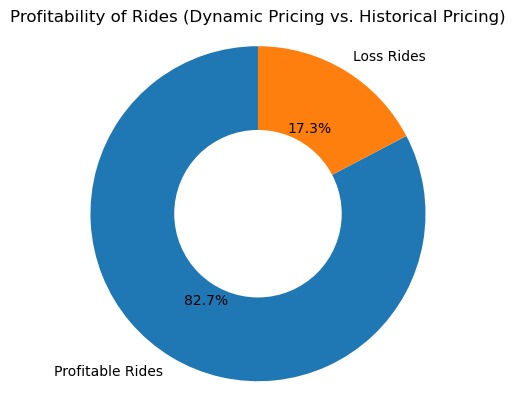

In [35]:
# Create a donut chart to show the distribution of profitable and loss rides
labels = ['Profitable Rides', 'Loss Rides']
values = [profitable_count, loss_count]

fig, ax = plt.subplots()
ax.pie(values, labels=labels,autopct='%1.1f%%',startangle=90)
hole_radius = 0.5
hole_center = (0, 0)

centre_circle = plt.Circle(hole_center, hole_radius, color='white', fc='white', linewidth=0)
fig.gca().add_artist(centre_circle)
ax.axis('equal')  
plt.title('Profitability of Rides (Dynamic Pricing vs. Historical Pricing)')
plt.show()



Now let’s have a look at the relationship between the expected ride duration and the cost of the ride based on the dynamic pricing strategy:

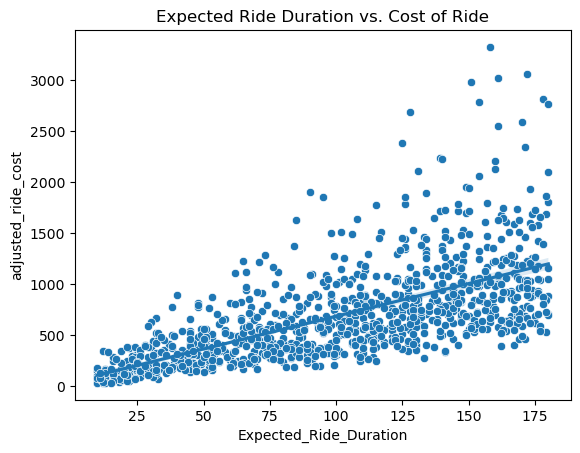

In [36]:
fig = sns.scatterplot(data=data, x='Expected_Ride_Duration', 
                 y='adjusted_ride_cost')
sns.regplot(data=data, x='Expected_Ride_Duration', 
            y='adjusted_ride_cost', scatter=False)

plt.title('Expected Ride Duration vs. Cost of Ride')

plt.show()

# Training a Predictive Model


# data preprocessing

In [37]:
from sklearn.preprocessing import StandardScaler

In [43]:
def data_preprocessing_pipeline(data):
    #Identify numeric and categorical features
    numeric_features = data.select_dtypes(include=['float', 'int']).columns
    categorical_features = data.select_dtypes(include=['object']).columns

    #Handle missing values in numeric features
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())
    #Detect and handle outliers in numeric features using IQR
    for feature in numeric_features:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        data[feature] = np.where((data[feature] < lower_bound) | (data[feature] > upper_bound),
                                 data[feature].mean(), data[feature])
    #Handle missing values in categorical features
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    return data

In the above code, we have implemented a data preprocessing pipeline to preprocess the data.

In [44]:
data["Vehicle_Type"] = data["Vehicle_Type"].map({"Premium": 1, 
                                           "Economy": 0})

In [45]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Number_of_Riders", "Number_of_Drivers", "Vehicle_Type", "Expected_Ride_Duration"]])
y = np.array(data[["adjusted_ride_cost"]])


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)


In [47]:
# Reshape y to 1D array
y_train = y_train.ravel()
y_test = y_test.ravel()


In [48]:
# Training a random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [49]:
def get_vehicle_type_numeric(vehicle_type):
    vehicle_type_mapping = {
        "Premium": 1,
        "Economy": 0
    }
    vehicle_type_numeric = vehicle_type_mapping.get(vehicle_type)
    return vehicle_type_numeric
  
# Predicting using user input values
def predict_price(number_of_riders, number_of_drivers, vehicle_type, Expected_Ride_Duration):
    vehicle_type_numeric = get_vehicle_type_numeric(vehicle_type)
    if vehicle_type_numeric is None:
        raise ValueError("Invalid vehicle type")
    
    input_data = np.array([[number_of_riders, number_of_drivers, vehicle_type_numeric, Expected_Ride_Duration]])
    predicted_price = model.predict(input_data)
    return predicted_price

# Example prediction using user input values
user_number_of_riders = 50
user_number_of_drivers = 25
user_vehicle_type = "Economy"
Expected_Ride_Duration = 30
predicted_price = predict_price(user_number_of_riders, user_number_of_drivers, user_vehicle_type, Expected_Ride_Duration)
print("Predicted price:", predicted_price)

Predicted price: [240.62226405]


In [50]:
# Predict on the test set
y_pred = model.predict(x_test)


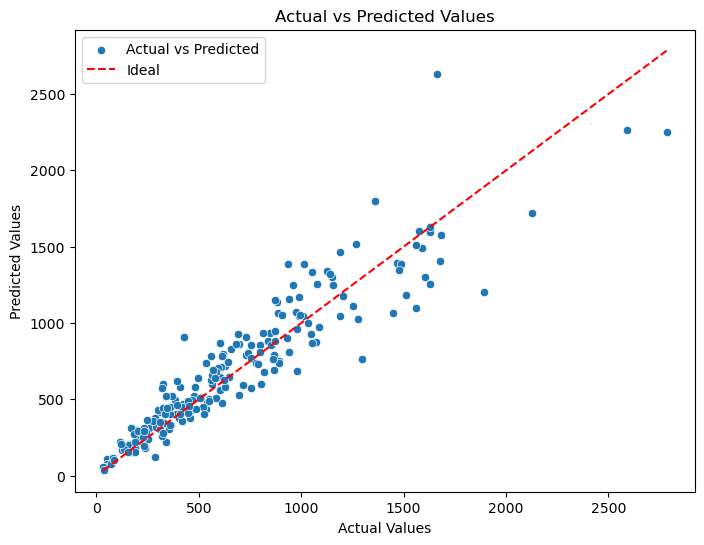

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test.flatten(), y=y_pred, label='Actual vs Predicted')

# Add a line representing the ideal case
plt.plot([min(y_test.flatten()), max(y_test.flatten())], [min(y_test.flatten()), max(y_test.flatten())], color='red', linestyle='--', label='Ideal')

# Set labels and title
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.show()